# Chapter 04 [추측통계의 기본]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('../../../Source/누구나 파이썬 통계분석/source/python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [4]:
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


## 4.1 모집단과 표본

### 4.1.1 표본추출 방법

In [5]:
# 무작위추출 - 복원추출
np.random.choice([1, 2, 3], 3)   # 기본 설정 - 복원추출

array([1, 2, 3])

In [6]:
# 무작위추출 - 비복원추출
np.random.choice([1, 2, 3], 3, replace=False)

array([3, 2, 1])

In [7]:
# 난수 시드 설정
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [8]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()   # 표본평균

70.4

In [9]:
scores.mean()   # 모평균

69.53

In [10]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 포본평균 :', sample.mean())

1번째 무작위추출로 얻은 포본평균 : 72.45
2번째 무작위추출로 얻은 포본평균 : 63.7
3번째 무작위추출로 얻은 포본평균 : 66.05
4번째 무작위추출로 얻은 포본평균 : 71.7
5번째 무작위추출로 얻은 포본평균 : 74.15


## 4.2 확률모형

### 4.2.1 확률의 기본

상호배반(mutually exclusive)

### 4.2.2 확률분포

In [11]:
# 확률분포 만들기
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

np.random.choice(dice, p=prob)

1

In [12]:
# 100번 시행
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)

sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [13]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency': freq, 
              'relative frequency': freq / num_trial}, 
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


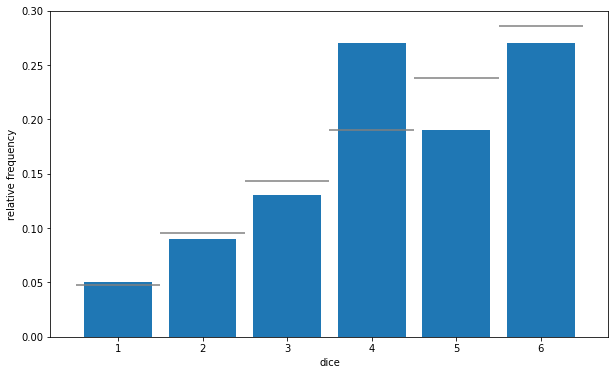

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

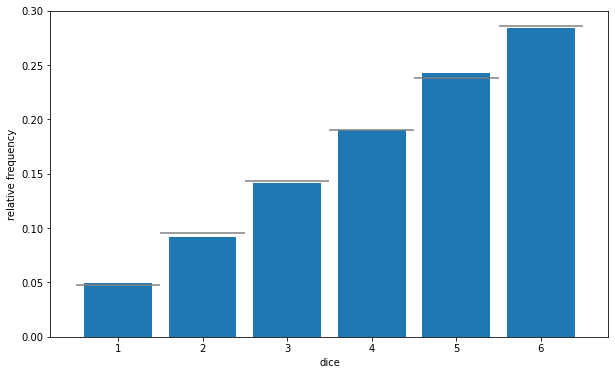

In [15]:
# 10000번 시행
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

## 4.3 추측통계의 확률

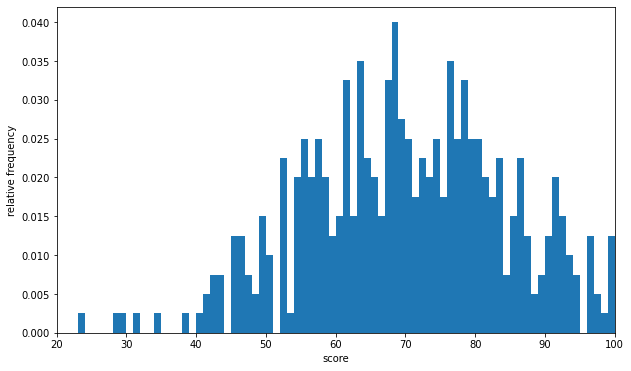

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

In [17]:
np.random.choice(scores)

89

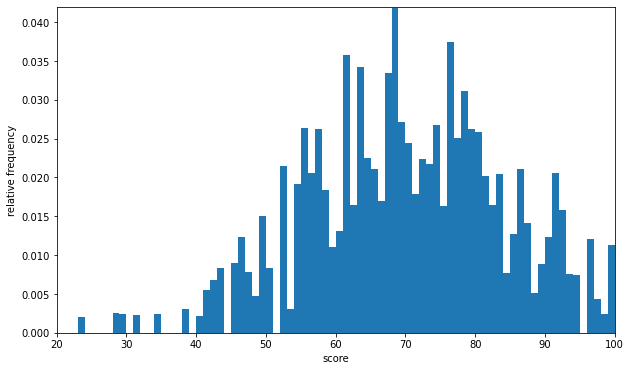

In [18]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

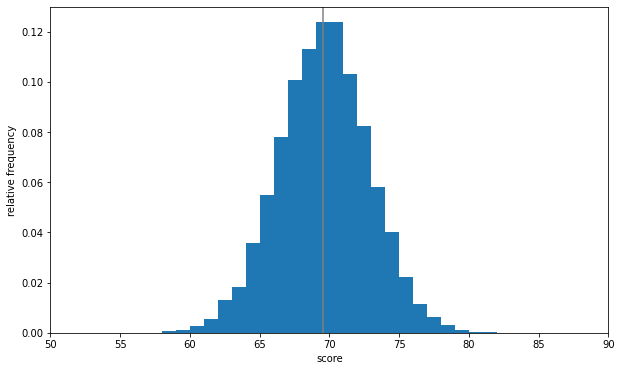

In [19]:
# 표본평균
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

## 4.4 이제부터 배울 내용

추정(estimation) : 모수를 추측하는 것(점추정, 구간추정)

검정(test) : 모집단의 통계적 성질에 대해 가설을 세우고, 그 가설이 옳은지 여부를 판단하는 기법